# Side project - Article Investigation

This is a small side project developed in order to make use of the content data that is now readily available.

The first part is ploting the frequency of specific words inside FT article titles over the years.

The second part plots the length of FT article titles over the years.

We can extend the first one to search in FT article bodies for the required word.

In [1]:
import os, sys
import pandas as pd
import nltk
from IPython.display import display
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the absolute path of directory where the data has been stored 
data_path = "/home/gkastro/title-prediction-tensorflow/content-data/"
os.chdir(data_path)

In [235]:
# You only need to run this block once, then you can start without executing this one since the DataFrame 
# will already exist as a pickle file.

title_df = pd.DataFrame(columns=["Year", "Month", "Title"])
for year in range(2008, 2018):
    for month in range(1, 13):
        path = str(year)+"/"+str(month)+"/"
        for filename in os.listdir(path):
            file = open(path+filename, "r")
            content = json.load(file)
            title = content["title"]["title"]
            row = pd.DataFrame([[year, month, title]], columns=["Year", "Month", "Title"])
            title_df = title_df.append(row)

            title_df["Year"] = title_df["Year"].apply(int)
            
title_df["Month"] = title_df["Month"].apply(int)
title_df.to_pickle("title-dataframe")
title_df = pd.read_pickle("title-dataframe")
t_df = title_df.copy()
tmp = pd.Series(t_df["Title"].apply(len), name="Title-length")
t_df.insert(len(t_df.columns), tmp.name, tmp.values)
t_df.to_pickle("title-dataframe-w-length")

In [2]:
t_df = pd.read_pickle("title-dataframe-w-length")
t_df.head()

,Year,Month,Title,Title-length
0,2008,1,The optimistic detectorist,26
0,2008,1,Kerviel is just part of a rogues’ gallery,41
0,2008,1,Lunch with the FT: Viswanathan Anand,36
0,2008,1,Companies warned on social reports,34
0,2008,1,Investors urged not to panic but to buy on falls,48


## Provide a word and see how often it appears throughout the years, in FT article titles

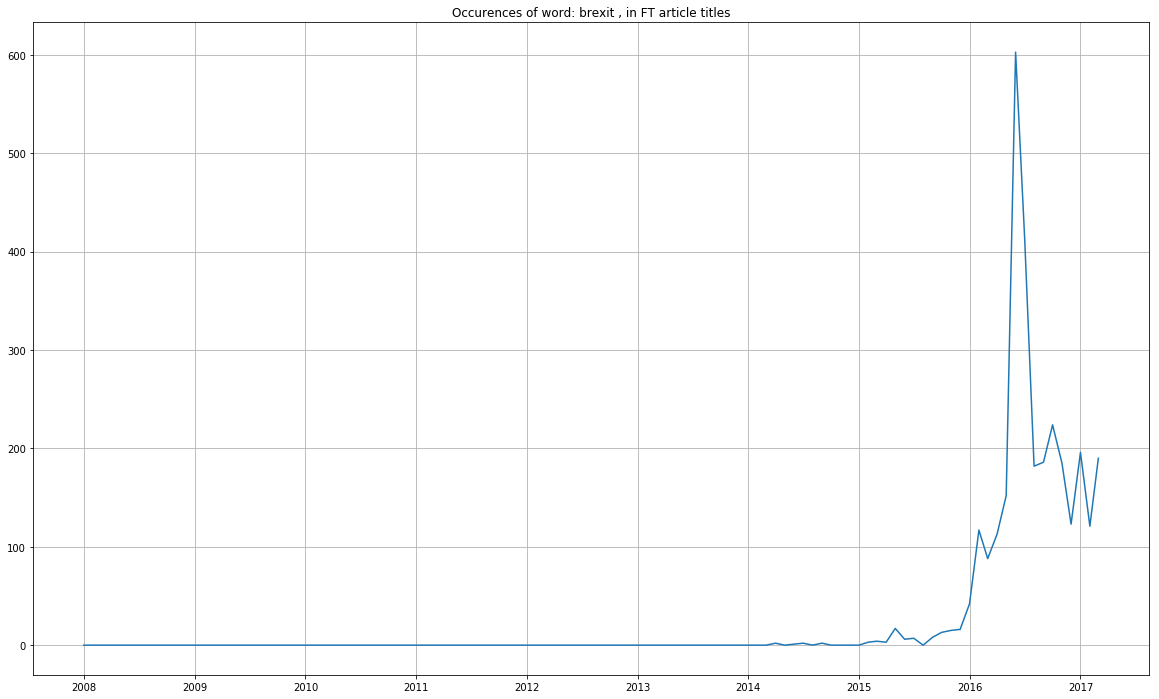

In [3]:
word = "brexit"
groups = t_df.groupby(["Year", "Month"])["Title"]
data = []
dates = []
for group in groups:
    count=0
    for title in group[1]:
        if word.lower() in title.lower().split(" "):
            count +=1
#     display(str(group[0][0])+"--"+str(group[0][1])+"--"+str(count))
    data.append(count)
    dates.append(str(group[0][0])+"/"+str(group[0][1]))
fig = plt.figure(figsize=(20,12))
plt.plot(pd.to_datetime(dates), data)
plt.title("Occurences of word: "+word+" , in FT article titles")
plt.grid()
plt.show()

## Median length (number of characters) of FT article titles throughout the years

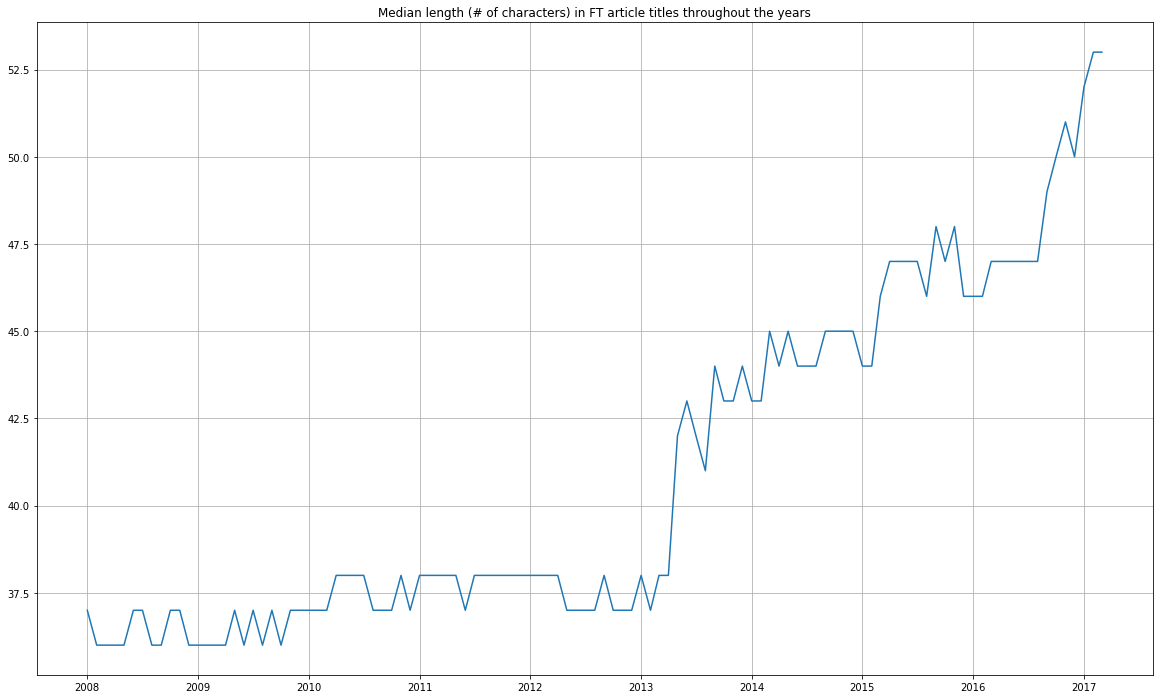

In [4]:
data = t_df.groupby(["Year","Month"])["Title-length"].median()
fig = plt.figure(figsize=(20,12))
plt.plot(pd.to_datetime(dates), data)
plt.title("Median length (# of characters) in FT article titles throughout the years")
plt.grid()
plt.show()